In [2]:
import pandas as pd



In [3]:
audiodiff_df = pd.read_csv('/Users/tbyfield/Downloads/audio_features_difference.csv')

In [4]:
audioweighted = pd.read_csv('/Users/tbyfield/Downloads/weighted_audio_features.csv')

In [5]:
audiodiff_df

,Artist,danceability,energy,speechiness,acousticness,instrumentalness,loudness,valence,tempo,duration_ms
0,DaBaby,0.111645,0.037665,0.193627,-0.148411,-0.007177,0.46902,0.088425,9.396799,-55269.658122
1,Billie Eilish,-0.207955,-0.368735,-0.020363,0.567581,0.158720,-6.74898,-0.279975,-6.469201,16068.441878
2,Post Malone,-0.034355,0.006165,-0.041583,-0.041983,-0.006927,0.95512,-0.033075,-5.182301,-12550.358122
3,SZA,-0.101155,-0.060235,-0.038223,0.085911,0.049369,-1.40048,-0.083075,-10.042801,-10190.958122
4,Drake,0.015945,-0.127735,0.052507,-0.179292,0.003223,-1.91138,-0.216175,13.045699,37175.341878
5,Lil Baby,0.143145,-0.110935,0.188477,-0.136545,-0.007177,-1.15328,-0.144775,-1.323001,-34076.658122
6,Taylor Swift,-0.066455,-0.025035,-0.045853,-0.037436,-0.006873,-0.80998,-0.144325,-5.258301,30636.841878
7,Luke Combs,-0.143955,0.051265,-0.074173,-0.063019,-0.007177,0.63372,-0.002775,-3.638901,16334.241878
8,Morgan Wallen,-0.095555,0.103665,-0.074353,0.082435,-0.007069,0.96322,0.033725,32.206599,-16500.458122
9,Doja Cat,0.088545,0.024165,0.013447,-0.032529,-0.002800,0.62642,0.082825,-4.242301,-14881.658122


In [6]:
import plotnine
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, theme, element_text

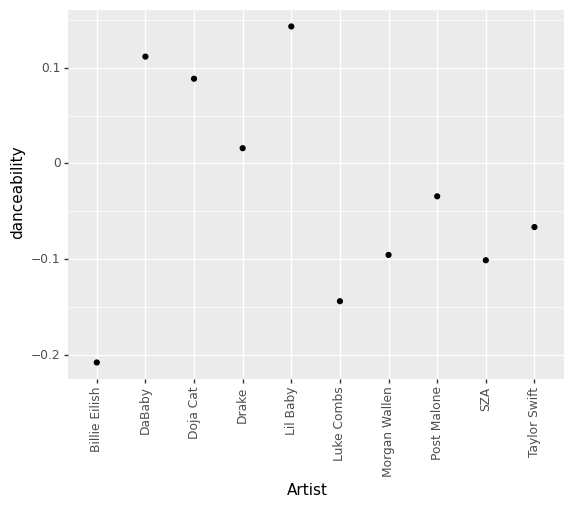

<ggplot: (306140136)>

In [7]:
(ggplot(audiodiff_df, aes('Artist','danceability'))
 + geom_point() + theme(axis_text_x = element_text(angle=90))
 )

In [11]:
# need to assign numbers to artists in order to create differently-coloured lines in the parallel coordinates plot

artist_number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
audiodiff_df['Artist Number'] = artist_number
audiodiff_df

,Artist,danceability,energy,speechiness,acousticness,instrumentalness,loudness,valence,tempo,duration_ms,Artist Number
0,DaBaby,0.111645,0.037665,0.193627,-0.148411,-0.007177,0.46902,0.088425,9.396799,-55269.658122,1
1,Billie Eilish,-0.207955,-0.368735,-0.020363,0.567581,0.158720,-6.74898,-0.279975,-6.469201,16068.441878,2
2,Post Malone,-0.034355,0.006165,-0.041583,-0.041983,-0.006927,0.95512,-0.033075,-5.182301,-12550.358122,3
3,SZA,-0.101155,-0.060235,-0.038223,0.085911,0.049369,-1.40048,-0.083075,-10.042801,-10190.958122,4
4,Drake,0.015945,-0.127735,0.052507,-0.179292,0.003223,-1.91138,-0.216175,13.045699,37175.341878,5
5,Lil Baby,0.143145,-0.110935,0.188477,-0.136545,-0.007177,-1.15328,-0.144775,-1.323001,-34076.658122,6
6,Taylor Swift,-0.066455,-0.025035,-0.045853,-0.037436,-0.006873,-0.80998,-0.144325,-5.258301,30636.841878,7
7,Luke Combs,-0.143955,0.051265,-0.074173,-0.063019,-0.007177,0.63372,-0.002775,-3.638901,16334.241878,8
8,Morgan Wallen,-0.095555,0.103665,-0.074353,0.082435,-0.007069,0.96322,0.033725,32.206599,-16500.458122,9
9,Doja Cat,0.088545,0.024165,0.013447,-0.032529,-0.002800,0.62642,0.082825,-4.242301,-14881.658122,10


In [13]:
import plotly.express as px

# color     : Values from this column are used to assign color to the poly lines.
# dimensions: Values from these columns form the axes in the plot.
fig = px.parallel_coordinates(audiodiff_df, 
                              dimensions=['danceability', 'loudness', 'valence','energy', 'speechiness', 'acousticness', 'instrumentalness', 'tempo'],
                              color="Artist Number",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=5.5)
fig.show()

In [15]:
# dataframe below will show which artist corresponds to which number
artist_number_df = pd.DataFrame({'Artist' : audiodiff_df['Artist'], 'Artist Number': audiodiff_df['Artist Number']})
artist_number_df

,Artist,Artist Number
0,DaBaby,1
1,Billie Eilish,2
2,Post Malone,3
3,SZA,4
4,Drake,5
5,Lil Baby,6
6,Taylor Swift,7
7,Luke Combs,8
8,Morgan Wallen,9
9,Doja Cat,10


In [ ]:
# limitations of parallel coordinate graph using plotly:
# 1. plotly does not support categorical colour schemes, hence a numbered scale is needed to assign colours to different artists
# 2. plotly only has a set width for lines in parallel coordinate graphs, hence the lines can appear to be too thin

In [17]:
pd.read_csv('/Users/tbyfield/Documents/artist_audio_df.csv')

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,analysis_url,duration_ms,time_signature,track_name,album_name,short_album_name,release_date,album_id,artist_id,artist
0,0,0.779,0.640,7,-8.415,1,0.1590,0.000155,0.000770,0.101,...,https://api.spotify.com/v1/audio-analysis/4Tsm...,246960,4,Pon de Replay,Music Of The Sun,Music Of The Sun,2005-08-29,4FyGpObwABjn0o8Tdp7AZz,5pKCCKE2ajJHZ9KAiaK11H,"[{'danceability': 0.779, 'energy': 0.64, 'key'..."
1,12,0.778,0.737,7,-7.861,1,0.2510,0.000310,0.000000,0.276,...,https://api.spotify.com/v1/audio-analysis/1B4i...,217187,4,Pon De Replay - Remix,Music Of The Sun,Music Of The Sun,2005-08-29,4FyGpObwABjn0o8Tdp7AZz,5pKCCKE2ajJHZ9KAiaK11H,"[{'danceability': 0.779, 'energy': 0.64, 'key'..."
2,11,0.315,0.267,9,-11.355,1,0.0289,0.853000,0.000002,0.204,...,https://api.spotify.com/v1/audio-analysis/35Hi...,300587,3,Now I Know,Music Of The Sun,Music Of The Sun,2005-08-29,4FyGpObwABjn0o8Tdp7AZz,5pKCCKE2ajJHZ9KAiaK11H,"[{'danceability': 0.779, 'energy': 0.64, 'key'..."
3,9,0.751,0.822,1,-4.533,1,0.1640,0.001000,0.002200,0.259,...,https://api.spotify.com/v1/audio-analysis/5NH2...,189573,4,Rush,Music Of The Sun,Music Of The Sun,2005-08-29,4FyGpObwABjn0o8Tdp7AZz,5pKCCKE2ajJHZ9KAiaK11H,"[{'danceability': 0.779, 'energy': 0.64, 'key'..."
4,8,0.753,0.771,5,-5.833,0,0.1450,0.054100,0.000304,0.133,...,https://api.spotify.com/v1/audio-analysis/4tAq...,236400,4,Let Me,Music Of The Sun,Music Of The Sun,2005-08-29,4FyGpObwABjn0o8Tdp7AZz,5pKCCKE2ajJHZ9KAiaK11H,"[{'danceability': 0.779, 'energy': 0.64, 'key'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,132,0.701,0.425,7,-10.965,1,0.3750,0.328000,0.130000,0.100,...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4,bad guy,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?","WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,0S0KGZnfBGSIssfF54WSJh,6qqNVTkY8uBg9cP3Jd7DAH,"[{'danceability': 0.779, 'energy': 0.64, 'key'..."
141,131,0.000,0.278,1,-21.630,1,0.0000,0.768000,0.000000,0.669,...,https://api.spotify.com/v1/audio-analysis/0rQt...,13578,0,!!!!!!!,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?","WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,0S0KGZnfBGSIssfF54WSJh,6qqNVTkY8uBg9cP3Jd7DAH,"[{'danceability': 0.779, 'energy': 0.64, 'key'..."
142,143,0.421,0.131,0,-18.435,1,0.0382,0.952000,0.004530,0.109,...,https://api.spotify.com/v1/audio-analysis/6CcJ...,291796,4,i love you,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?","WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,0S0KGZnfBGSIssfF54WSJh,6qqNVTkY8uBg9cP3Jd7DAH,"[{'danceability': 0.779, 'energy': 0.64, 'key'..."
143,136,0.853,0.351,7,-10.198,1,0.2410,0.390000,0.000009,0.752,...,https://api.spotify.com/v1/audio-analysis/3Fj4...,221543,4,wish you were gay,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?","WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,0S0KGZnfBGSIssfF54WSJh,6qqNVTkY8uBg9cP3Jd7DAH,"[{'danceability': 0.779, 'energy': 0.64, 'key'..."


In [18]:
pd.read_csv('/Users/tbyfield/Documents/avg_features_df.csv')

,Unnamed: 0,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id
0,0,Drake,0.7140,0.5043,5.5,-8.0710,0.6,0.15914,0.067127,1.040079e-02,0.19114,0.29600,135.3875,duration_ms: 236414.4,time_signature: 3.9
1,1,Morgan Wallen,0.6025,0.7357,6.9,-5.1964,0.7,0.03228,0.328854,1.086530e-04,0.21400,0.54590,154.5484,duration_ms: 182738.6,time_signature: 3.9
2,2,Lil Baby,0.8412,0.5211,5.5,-7.3129,0.0,0.29511,0.109874,6.570000e-07,0.15590,0.36740,121.0188,duration_ms: 165162.4,time_signature: 3.9
3,3,Taylor Swift,0.6390,0.6066,6.0,-7.0623,0.8,0.06116,0.223530,1.457570e-04,0.18957,0.34615,118.1842,duration_ms: 230222.6,time_signature: 3.9
4,4,Doja Cat,0.7866,0.6562,7.0,-5.5332,0.6,0.12008,0.213890,4.378340e-03,0.16585,0.59500,118.0995,duration_ms: 184357.4,time_signature: 4.0
5,5,Luke Combs,0.5541,0.6833,5.8,-5.5259,1.0,0.03246,0.183400,1.250000e-06,0.17208,0.50940,118.7029,duration_ms: 215573.3,time_signature: 4.0
6,6,Post Malone,0.6637,0.6382,5.0,-5.2045,0.7,0.06505,0.204436,2.511880e-04,0.14261,0.47910,117.1595,duration_ms: 186688.7,time_signature: 4.0
7,7,DaBaby,0.8097,0.6697,4.6,-5.6906,0.7,0.30026,0.098008,5.840000e-07,0.15054,0.60060,131.7386,duration_ms: 143969.4,time_signature: 4.0
8,8,SZA,0.5969,0.5718,5.2,-7.5601,0.5,0.06841,0.332330,5.654681e-02,0.21059,0.42910,112.2990,duration_ms: 189048.1,time_signature: 3.9
9,9,Billie Eilish,0.4901,0.2633,4.8,-12.9086,0.6,0.08627,0.814000,1.658980e-01,0.11592,0.23220,115.8726,duration_ms: 215307.5,time_signature: 3.8
